**Personal Key Indicaters of Heart Disease**

My objective with this analysis is to acquire practical experience by applying a variety of techniques and approaches.My goal is to enhance my grasp of data analysis while simultaneously generating valuable insights through the utilization of machine learning methods. This project exemplifies my dedication to learning and my determination to excel in the field of data analysis.

**Data Source:**

I'm currently utilizing a dataset obtained from Kaggle, with a specific focus on the "Personal Key Indicators of Heart Disease" dataset. This dataset originates from the 2020 annual CDC survey, encompassing health-related information from a staggering 400,000 adults. It's worth noting that this dataset exhibits class imbalance, where one class significantly outweighs the other. To address this issue and enhance the performance of our machine learning model, I'm considering the implementation of oversampling techniques, such as SMOTE (Synthetic Minority Over-sampling Technique). SMOTE has the potential to rectify the class imbalance by generating synthetic data points for the minority class. This augmentation aids the model in better learning from the minority class, ultimately leading to more accurate predictions.

**Loading libraries**

In [212]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt 
import seaborn as sns
sns.set_theme()
sns.set(rc={'figure.figsize':(9, 5)})
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

**Loading the dataset:**

In [213]:
df = pd.read_csv("C:\\Users\\raffa\\OneDrive\\Documenti\\Heart_diseases\\heart_2020_cleaned.csv")

**Exploring the dataset:**

In [214]:
df.shape

(319795, 18)

In [215]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [216]:
df.tail()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No
319794,No,46.56,No,No,No,0.0,0.0,No,Female,80 or older,Hispanic,No,Yes,Good,8.0,No,No,No


In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [218]:
df.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

**Observation of the variables:**

In [219]:
summary = df.describe().T
styled_summary = summary.style.background_gradient(cmap='coolwarm')
styled_summary

,count,mean,std,min,25%,50%,75%,max
BMI,319795.000000,28.325399,6.356100,12.020000,24.030000,27.340000,31.420000,94.850000
PhysicalHealth,319795.000000,3.371710,7.950850,0.000000,0.000000,0.000000,2.000000,30.000000
MentalHealth,319795.000000,3.898366,7.955235,0.000000,0.000000,0.000000,3.000000,30.000000
SleepTime,319795.000000,7.097075,1.436007,1.000000,6.000000,7.000000,8.000000,24.000000


**Analysis by gender**

In [220]:
df.groupby(['Sex','HeartDisease'])['HeartDisease'].count()

Sex     HeartDisease
Female  No              156571
        Yes              11234
Male    No              135851
        Yes              16139
Name: HeartDisease, dtype: int64

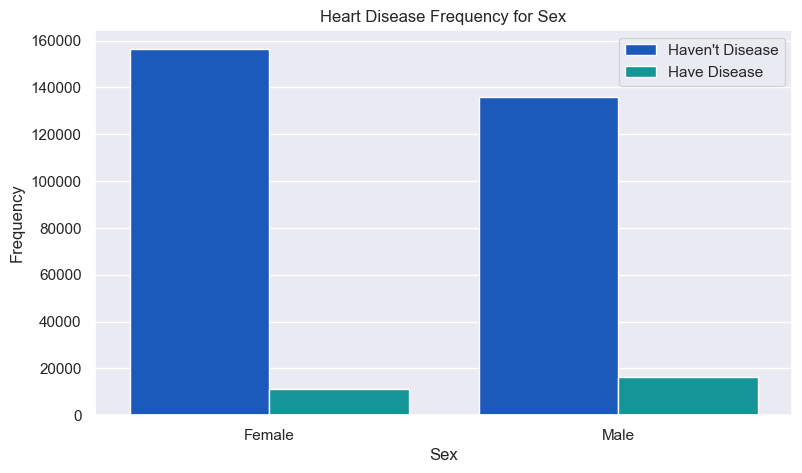

In [221]:
sns.countplot(x = df['Sex'], data=df, hue='HeartDisease', palette="winter")
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex')
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

**Analysis by Age**

In [222]:
df.groupby(['AgeCategory','HeartDisease'])['HeartDisease'].count()

AgeCategory  HeartDisease
18-24        No              20934
             Yes               130
25-29        No              16822
             Yes               133
30-34        No              18527
             Yes               226
35-39        No              20254
             Yes               296
40-44        No              20520
             Yes               486
45-49        No              21047
             Yes               744
50-54        No              23999
             Yes              1383
55-59        No              27555
             Yes              2202
60-64        No              30359
             Yes              3327
65-69        No              30050
             Yes              4101
70-74        No              26218
             Yes              4847
75-79        No              17433
             Yes              4049
80 or older  No              18704
             Yes              5449
Name: HeartDisease, dtype: int64

In [223]:
df['AgeCategory'] = pd.Categorical(df['AgeCategory'], ordered=True)

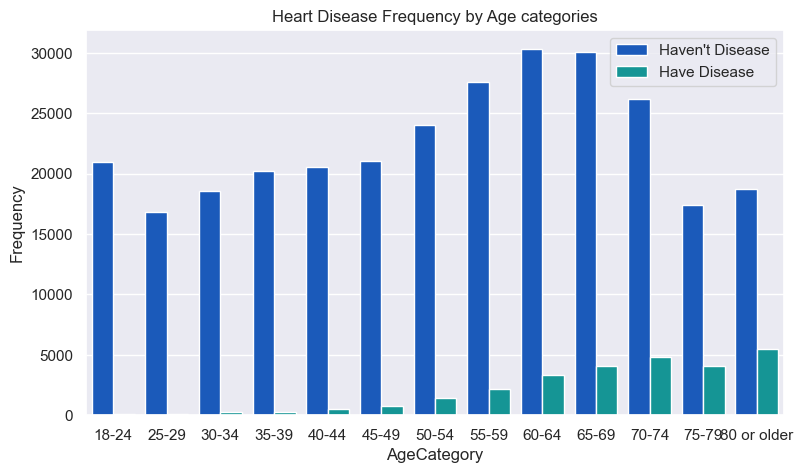

In [224]:
sns.countplot(x = df['AgeCategory'], data=df, hue='HeartDisease', palette="winter")
plt.title('Heart Disease Frequency by Age categories')
plt.xlabel('AgeCategory')
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

**Analysis by General Health and Gender**

In [225]:
have_heart_attack=df[df.HeartDisease =='Yes']

In [226]:
General_health = pd.DataFrame(have_heart_attack.GenHealth.value_counts()/len(have_heart_attack.GenHealth)*100)
print(round(General_health,2))


           count
GenHealth       
Good       34.92
Fair       25.88
Very good  19.66
Poor       14.06
Excellent   5.48


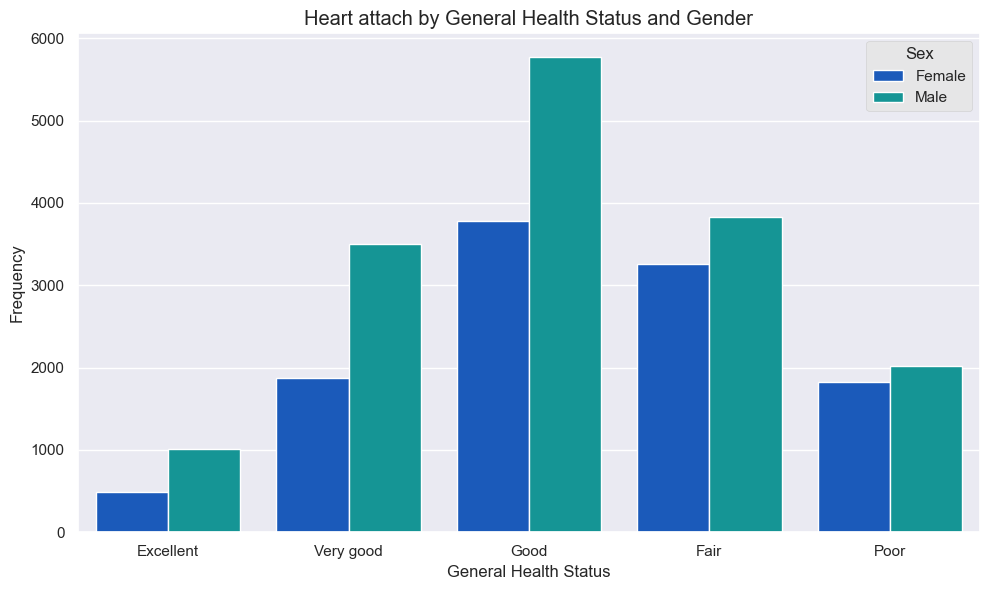

In [227]:
GenHealth = ['Excellent', 'Very good', 'Good','Fair','Poor']
plt.figure(figsize=(10, 6))  # Set the figure size
sns.countplot(x=have_heart_attack['GenHealth'], hue=have_heart_attack['Sex'], palette='winter', order=GenHealth)
plt.style.use('ggplot')
plt.title('Heart attach by General Health Status and Gender')
plt.xlabel('General Health Status')
plt.ylabel('Frequency')
plt.legend(title='Sex')
plt.tight_layout()
plt.show()

**Preparing the dataset for machine learning methods:**

In [233]:
df2 = df.copy()

In [234]:
label=LabelEncoder() #Trasforming coloumn in numerical values
for col in df2:
    df2[col]=label.fit_transform(df2[col])
df2 

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,223,1,0,0,3,30,0,0,7,5,2,1,4,4,1,0,1
1,0,524,0,0,1,0,0,0,0,12,5,0,1,4,6,0,0,0
2,0,1103,1,0,0,20,30,0,1,9,5,2,1,1,7,1,0,0
3,0,883,0,0,0,0,0,0,0,11,5,0,0,2,5,0,0,1
4,0,837,0,0,0,28,0,1,0,4,5,0,1,4,7,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,1180,1,0,0,7,0,1,1,8,3,2,0,1,5,1,0,0
319791,0,1397,1,0,0,0,0,0,1,3,3,0,1,4,4,1,0,0
319792,0,886,0,0,0,0,0,0,0,5,3,0,1,2,5,0,0,0
319793,0,1658,0,0,0,0,0,0,0,1,3,0,0,2,11,0,0,0


In [235]:
df2.dtypes

HeartDisease        int32
BMI                 int64
Smoking             int32
AlcoholDrinking     int32
Stroke              int32
PhysicalHealth      int64
MentalHealth        int64
DiffWalking         int32
Sex                 int32
AgeCategory         int32
Race                int32
Diabetic            int32
PhysicalActivity    int32
GenHealth           int32
SleepTime           int64
Asthma              int32
KidneyDisease       int32
SkinCancer          int32
dtype: object

In [236]:
X = df2.drop('HeartDisease',axis=1)
y = df2['HeartDisease']

smote = SMOTE()

X_resampled, y_resampled = smote.fit_resample(X, y)


In [238]:
df2 = pd.concat([X_resampled, y_resampled], axis="columns")
df2.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,223,1,0,0,3,30,0,0,7,5,2,1,4,4,1,0,1,0
1,524,0,0,1,0,0,0,0,12,5,0,1,4,6,0,0,0,0
2,1103,1,0,0,20,30,0,1,9,5,2,1,1,7,1,0,0,0
3,883,0,0,0,0,0,0,0,11,5,0,0,2,5,0,0,1,0
4,837,0,0,0,28,0,1,0,4,5,0,1,4,7,0,0,0,0


**Preparing the data into training and testing:**

In [239]:
X = df2.drop('HeartDisease',axis=1)
y = df2['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

**Decision Tree Classifies:**

In [240]:
DT = DecisionTreeClassifier()
DT = DecisionTreeClassifier(max_depth=4)
DT.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=4)

In [241]:
acc_lr=DT.score(X_test,y_test)
acc_DT=DT.score(X_test,y_test)
print("accuracy:", DT.score(X_test,y_test))

accuracy: 0.7539417302680325


**Logistic Regression:**

In [242]:

mdl = LogisticRegression(solver='liblinear', max_iter=10000, C=10)  # Adjust max_iter as needed
mdl.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=10000, solver='liblinear')

In [243]:
mdl.feature_names_in_

array(['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth',
       'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race',
       'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma',
       'KidneyDisease', 'SkinCancer'], dtype=object)

In [244]:
mdl.coef_

array([[ 3.12800916e-04, -1.72620198e-01, -2.07037820e+00,
         4.79195228e-02,  3.96445154e-02,  1.27323652e-02,
        -5.81606796e-01,  2.08905318e-01,  3.49718619e-01,
         3.87077639e-02,  1.78091100e-01, -1.00668102e+00,
        -1.58837474e-01, -2.01297353e-01, -9.45658645e-01,
        -5.75291957e-01, -9.33631478e-01]])

In [245]:
mdl.intercept_

array([-1.16543333])

In [246]:
y_pred_train = mdl.predict(X_train)
y_pred_test = mdl.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Train Accuracy: ", train_accuracy)
print("Test Accuracy: ", test_accuracy)


Train Accuracy:  0.7481351044418073
Test Accuracy:  0.7483717532215193


**Classification report:**

In [247]:
y_pred_test = mdl.predict(X_test)

report = classification_report(y_test, y_pred_test)
print("Classificaton Report:")
print(report)


Classificaton Report:
              precision    recall  f1-score   support

           0       0.76      0.72      0.74     96403
           1       0.74      0.77      0.76     96596

    accuracy                           0.75    192999
   macro avg       0.75      0.75      0.75    192999
weighted avg       0.75      0.75      0.75    192999

